In [1]:
!pip install beautifulsoup4 lxml

!pip install selenium

!pip install selenium webdriver-manager beautifulsoup4


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://www.eurocontrol.int/Economics/DailyTrafficVariation-States.html"
response = requests.get(url)

# Ensure the page was fetched successfully
if response.status_code != 200:
    print("Failed to fetch the webpage")
    exit()

soup = BeautifulSoup(response.content, "html.parser")
chart_div = soup.find('div', id='MyGeoEntityChart_div') # Find the chart div

# Extract the <svg> element with aria-label="A chart."
svg = chart_div.find('svg', {'aria-label': 'A chart.'})

# Output the extracted SVG
if svg:
    print(svg.prettify())
else:
    print("SVG element not found")

SVG element not found


In [ ]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<title>Daily Traffic Variation - States</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://maxcdn.bootstrapcdn.com/bootstrap/4.5.0/css/bootstrap.min.css" rel="stylesheet"/>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.5.1/jquery.min.js"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.16.0/umd/popper.min.js"></script>
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/4.5.0/js/bootstrap.min.js"></script>
<link crossorigin="anonymous" href="https://use.fontawesome.com/releases/v5.7.2/css/all.css" integrity="sha384-fnmOCqbTlWIlj8LyTjo7mOUStjsKC4pOpQbqyi7RrhN7udi9RwhKkMHpvLbHG9Sr" rel="stylesheet"/>
<meta content=".img-responsive { margin: 0 auto; max-width: 75% } .resp-container { position: relative; overflow: hidden; padding-top: 50." name="description"/>
<!-- Google Font -->
<link href="https://fonts.googleapis.com" rel="preconnect"

In [2]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service as EdgeService
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from bs4 import BeautifulSoup

# Automatically manage EdgeDriver
service = EdgeService(EdgeChromiumDriverManager().install())
driver = webdriver.Edge(service=service)

# Navigate to the URL
driver.get('https://www.eurocontrol.int/Economics/DailyTrafficVariation-States.html')

# Wait for the content to load
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Locate the chart div
chart_div = soup.find('div', {'id': 'MyGeoEntityChart_div'})

if chart_div:
    svg = chart_div.find('svg')
    if svg:
        print("SVG found!")
    else:
        print("SVG not found.")
else:
    print("Chart div not found.")

# Close the driver session
driver.quit()


SVG found!


In [ ]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service as EdgeService
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.by import By
import time

# Automatically manage EdgeDriver
service = EdgeService(EdgeChromiumDriverManager().install())
driver = webdriver.Edge(service=service)

url = 'https://www.eurocontrol.int/Economics/DailyTrafficVariation-States.html'
driver.get(url)

soup = BeautifulSoup(driver.page_source, 'html.parser')

# Locate the chart div
chart_div = soup.find('div', {'id': 'MyGeoEntityChart_div'})

if chart_div:
    table = chart_div.find('table')
    date = chart_div.find('text', {'text-anchor': 'start'})
    print (date)
    
    if table:
        # Extract table headers (optional)
        headers = [th.text.strip() for th in table.find('thead').find_all('th')]

        # Extract table rows
        rows = []
        for tr in table.find('tbody').find_all('tr'):
            cells = [td.text.strip() for td in tr.find_all('td')]
            rows.append(cells)

        # Print the extracted data
        print("Headers:", headers)
        print("Data:")
        for row in rows:
            print(row)
    else:
        print("Table not found inside chart_div.")
else:
    print("Chart div not found.")

# Close the driver session
driver.quit()

# Close the driver session
driver.quit()


Headers: ['Entity', 'Flights']
Data:
['United Kingdom', '4,129']
['Germany', '3,909']
['Spain', '3,898']
['France', '3,044']
['Italy', '2,659']
['Türkiye', '2,415']
['Netherlands', '1,442']
['Norway', '1,313']
['Poland', '962']
['Switzerland', '961']
['Portugal', '854']
['Sweden', '758']
['Belgium', '739']
['Denmark', '706']
['Greece', '688']
['Austria', '651']
['Morocco', '561']
['Ireland', '547']
['Finland', '506']
['Romania', '456']
['Czech Republic', '306']
['Hungary', '302']
['Israel', '280']
['Serbia & Montenegro', '223']
['Bulgaria', '169']
['Luxembourg', '165']
['Cyprus', '163']
['Georgia', '157']
['Croatia', '154']
['Albania', '136']
['Lithuania', '123']
['Latvia', '122']
['Malta', '120']
['Estonia', '98']
['Armenia', '84']
['Moldova', '80']
['Slovakia', '57']
['North Macedonia', '51']
['Bosnia-Herzegovina', '50']
['Slovenia', '49']
['Ukraine', '0']


In [13]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service as EdgeService
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

service = EdgeService(EdgeChromiumDriverManager().install())
driver = webdriver.Edge(service=service)

url = 'https://www.eurocontrol.int/Economics/DailyTrafficVariation-States.html'
driver.get(url)

time.sleep(5)  # Adjust based on the page loading time

soup = BeautifulSoup(driver.page_source, 'html.parser')

chart_div = soup.find('div', {'id': 'MyGeoEntityChart_div'})

if chart_div:
    table = chart_div.find('table')
    date = chart_div.find('text', {'text-anchor': 'start'})
    print (date.get_text())
    
    if table:
        headers = [th.text.strip() for th in table.find('thead').find_all('th')]

        rows = []
        for tr in table.find('tbody').find_all('tr'):
            cells = [td.text.strip() for td in tr.find_all('td')]
            rows.append(cells)

        # Create a DataFrame from the scraped data
        df_flights = pd.DataFrame(rows, columns=headers)

        df_flights.to_csv(f"{date.get_text()}.csv", index=False)  # Save the DataFrame to a CSV file

        print(df_flights)
    else:
        print("Table not found inside chart_div.")
else:
    print("Chart div not found.")

# Close the driver session
driver.quit()


Flights - Tue Nov 19 2024 (All flights)
                 Entity Flights
0        United Kingdom   4,129
1               Germany   3,909
2                 Spain   3,898
3                France   3,044
4                 Italy   2,659
5               Türkiye   2,415
6           Netherlands   1,442
7                Norway   1,313
8                Poland     962
9           Switzerland     961
10             Portugal     854
11               Sweden     758
12              Belgium     739
13              Denmark     706
14               Greece     688
15              Austria     651
16              Morocco     561
17              Ireland     547
18              Finland     506
19              Romania     456
20       Czech Republic     306
21              Hungary     302
22               Israel     280
23  Serbia & Montenegro     223
24             Bulgaria     169
25           Luxembourg     165
26               Cyprus     163
27              Georgia     157
28              Croatia     154


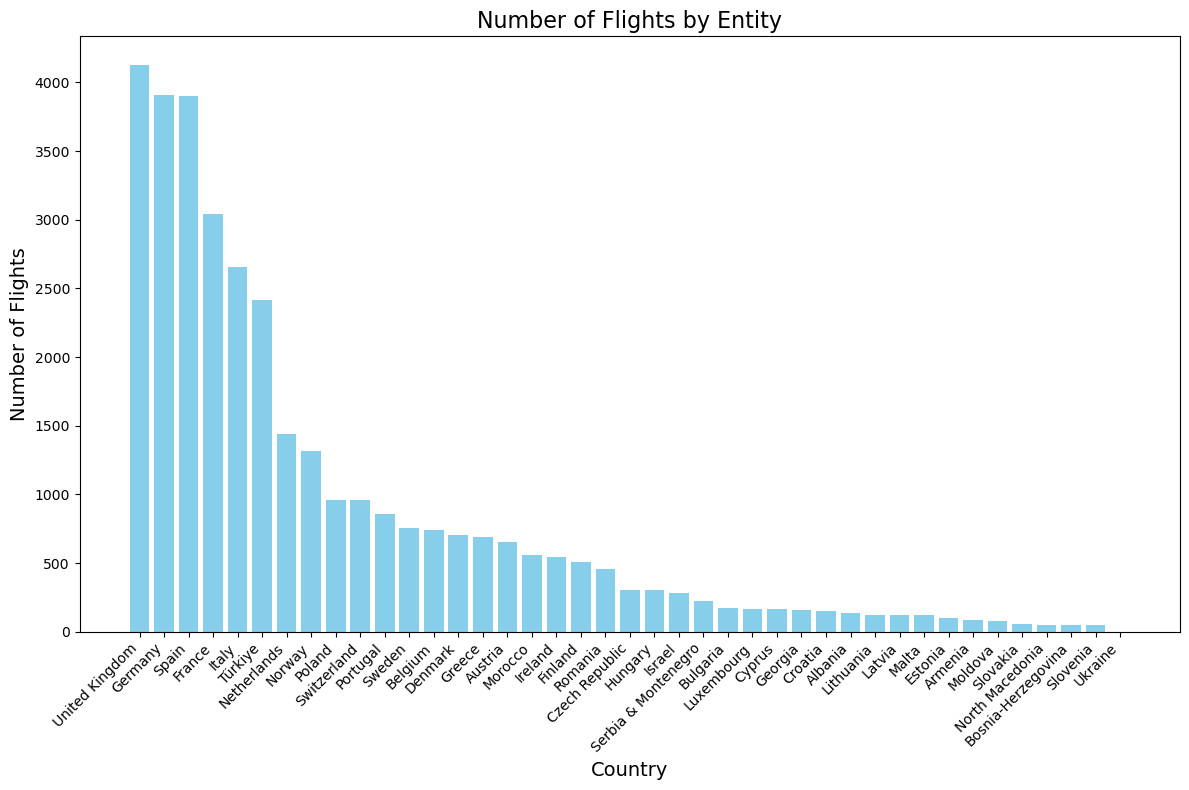

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df_flights['Flights'] = df_flights['Flights'].str.replace(',', '').astype(int)

plt.figure(figsize=(12, 8))
plt.bar(df_flights['Entity'], df_flights['Flights'], color='skyblue')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.title('Number of Flights by Entity', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

plt.show()